# Load prediction of CT1 based on Ambient Conditions
### by analysis of ambient condition, deduce the ideal load of the machine using previous data
5 year data  
convert into single df  
part data into 80:20 ratio (80% training data and 20% test data)

In [17]:
import numpy as np
import pandas as pd
from sklearn import datasets, linear_model
from sklearn.model_selection import train_test_split
from matplotlib import pyplot as plt
#from pandas import ExcelWriter
#from pandas import ExcelFile
features = pd.read_excel('data/Ops Monthly Returns 2016.xls',
                   #skiprows = [0,1,3,4],            
                   #skipfooter= 48, #Number of rows to skip from bottom
                   usecols= "B:F", #Column index in Excel format
                   sheet_name=0)

In [18]:
print(features.columns)

features=features[features["Base_hours"]==24]
features

Index(['Amb_Temp_F', 'Avg_RH_Pct', 'Base_hours', 'Gen_MWH', 'Comp_eff'], dtype='object')


,Amb_Temp_F,Avg_RH_Pct,Base_hours,Gen_MWH,Comp_eff
0,80.70,0.6210,24,1064,85.700
1,81.60,0.6280,24,1057,85.700
2,78.00,0.6310,24,1072,85.700
3,81.00,0.4790,24,1086,85.540
4,81.10,0.4830,24,1087,85.570
...,...,...,...,...,...
270,60.69,0.6341,24,1095,84.480
271,62.30,0.7090,24,1073,84.230
272,62.79,0.7565,24,1056,84.019
273,55.00,0.8900,24,1077,84.010


In [19]:
Y=features["Gen_MWH"]
Y

0      1064
1      1057
2      1072
3      1086
4      1087
       ... 
270    1095
271    1073
272    1056
273    1077
274    1070
Name: Gen_MWH, Length: 251, dtype: int64

In [20]:
X = features
X=X.drop(columns=["Gen_MWH"])
X

,Amb_Temp_F,Avg_RH_Pct,Base_hours,Comp_eff
0,80.70,0.6210,24,85.700
1,81.60,0.6280,24,85.700
2,78.00,0.6310,24,85.700
3,81.00,0.4790,24,85.540
4,81.10,0.4830,24,85.570
...,...,...,...,...
270,60.69,0.6341,24,84.480
271,62.30,0.7090,24,84.230
272,62.79,0.7565,24,84.019
273,55.00,0.8900,24,84.010


In [5]:
# create training and testing vars
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.2)
print(X_train.shape, y_train.shape)
print(X_test.shape, y_test.shape)

(200, 4) (200,)
(51, 4) (51,)


In [6]:
# fit a model
lm = linear_model.LinearRegression()
model = lm.fit(X_train, y_train)
predictions = model.predict(X_test)

Text(0, 0.5, 'Predictions')

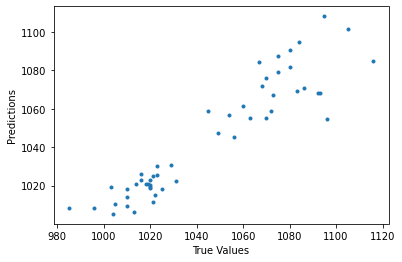

In [7]:
## The line / model
# Model without removing a static data column (Base Hours)
%matplotlib inline
plt.plot(y_test, predictions,'.')
plt.xlabel("True Values")
plt.ylabel("Predictions")

In [8]:
#d=y_test-predictions
y_test.values-predictions

array([-12.20863985,  14.68720987,  -4.03539634,   0.72406973,
        -1.66577014,  -2.55344609,  -3.73942748,  31.13453553,
       -10.79156427, -13.16787623,   1.77314767,   1.47016071,
        -5.89310444,  23.57360721,  -1.54069564,  -9.84143622,
         7.94081859,   7.04180072,  13.84689461,  41.55473328,
        10.74940142,  -2.78248749,  -6.65600064,  -2.02374798,
        -1.2060344 ,  25.05219957,  -8.00403831, -10.63482571,
        14.98525876,  13.32436973,  -2.655324  , -13.64109984,
        -5.29693459,  -0.2367222 , -17.15097339,  -4.08796443,
        -6.94315433, -16.12465474,   9.70068717,   3.36266235,
        -2.68943481,  -4.24038008,  -1.52443575,   8.3907718 ,
         0.81968795,   7.01956943,   6.64636146, -23.30825238,
         5.99395136,  -7.05625717, -12.4626159 ])

In [21]:
# Remove column Base_hours that contains a single fixed value 
X=X.drop(columns="Base_hours")
X

,Amb_Temp_F,Avg_RH_Pct,Comp_eff
0,80.70,0.6210,85.700
1,81.60,0.6280,85.700
2,78.00,0.6310,85.700
3,81.00,0.4790,85.540
4,81.10,0.4830,85.570
...,...,...,...
270,60.69,0.6341,84.480
271,62.30,0.7090,84.230
272,62.79,0.7565,84.019
273,55.00,0.8900,84.010


In [10]:
# create training and testing vars
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.2)
print(X_train.shape, y_train.shape)
print(X_test.shape, y_test.shape)

(200, 3) (200,)
(51, 3) (51,)


In [11]:
# fit a model
lm = linear_model.LinearRegression()
model = lm.fit(X_train, y_train)
predictions = model.predict(X_test)

Text(0, 0.5, 'Predictions')

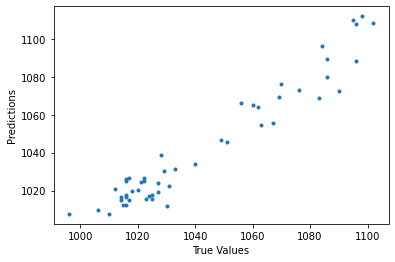

In [12]:
## The line / model
plt.plot(y_test, predictions,'.')
plt.xlabel("True Values")
plt.ylabel("Predictions")

In [13]:
#y_test['predictions'] = predictions
#y_test

In [22]:
# MSE (Mean Squared Error)
# sum(y-y')^2 / number of items
mse = np.sum((y_test.values-predictions)**2)/y_test.size
print(mse)
# An other method for same calculation
np.average((y_test.values-predictions)**2)

62.86063284130894


62.86063284130894

In [27]:
# Display weights of above Regression relation
for colnum in range(len(X.columns)):
    print("Weight for",X[X.columns[colnum]].name,'=', model.coef_[colnum])
# Insert an empty line
print()        
# Bias for the model equation
print("Bias:", model.intercept_)

print('Equation => Y = ',X[X.columns[0]].name,'(',model.coef_[0],') + '
     ,X[X.columns[1]].name,'(',model.coef_[1],') + '
     ,X[X.columns[2]].name,'(',model.coef_[2],') + '
     ,model.intercept_)

Weight for Amb_Temp_F = -3.7829069729765297
Weight for Avg_RH_Pct = -223.72426278666265
Weight for Comp_eff = 13.436846099388418

Bias: 344.1153999440255
Equation => Y =  Amb_Temp_F ( -3.7829069729765297 ) +  Avg_RH_Pct ( -223.72426278666265 ) +  Comp_eff ( 13.436846099388418 ) +  344.1153999440255
